In [493]:
import pandas as pd
import numpy as np

In [494]:
def gran_date(row):

    size = len(row['Date'])
    if size == 10:
        month = row['Date'].split('-')[1]
        day = row['Date'].split('-')[2]
        return month
    else:
        return np.nan

# month = gran_date(df_copy)

In [495]:
def gran_mode(row):
    return 'Major' if row['Mode'] == 1 else 'Minor'

In [496]:
path = '/Users/lucas/Desktop/spotifyProject/jupyter/data/top50.csv'

drop_columns = ['Track Name', 'Album Name', 'Markets', 'Date']

df = pd.read_csv(path).drop(columns='Unnamed: 0').dropna()
df['Month'] = df.apply(gran_date,axis=1)
df['Mode'] = df.apply(gran_mode, axis=1)
df = df.drop(columns=drop_columns)
df = pd.get_dummies(df, columns=['Artist Name', 'Key', 'Mode', 'TSignature', 'Month', 'Country']) # one hot encoding
df

,Popularity,Danceability,Acousticness,duration,Energy,Instrumentalness,Liveness,Loudness,Speechiness,Tempo,...,Country_SWE,Country_THA,Country_TUR,Country_TWN,Country_UKR,Country_URY,Country_USA,Country_VEN,Country_VNM,Country_ZAF
0,91,0.711,0.0447,206020,0.809,0.000000,0.3390,-4.389,0.0955,106.017,...,False,False,False,False,False,False,False,False,False,False
1,100,0.750,0.2560,131872,0.733,0.000000,0.1140,-3.180,0.0319,111.018,...,False,False,False,False,False,False,False,False,False,False
2,99,0.537,0.8270,184061,0.421,0.000000,0.1380,-8.720,0.0285,98.224,...,False,False,False,False,False,False,False,False,False,False
3,82,0.790,0.3120,183551,0.831,0.000000,0.0797,-4.185,0.0440,124.987,...,False,False,False,False,False,False,False,False,False,False
4,93,0.596,0.0504,229478,0.658,0.000000,0.1270,-7.346,0.0360,100.012,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3584,84,0.558,0.6110,175912,0.467,0.000000,0.1050,-6.292,0.0809,100.518,...,False,False,False,False,False,False,False,False,True,False
3585,63,0.443,0.8640,133562,0.371,0.780000,0.4210,-12.080,0.0377,92.468,...,False,False,False,False,False,False,False,False,True,False
3586,83,0.787,0.0147,179164,0.573,0.000017,0.0926,-6.197,0.0606,111.996,...,False,False,False,False,False,False,False,False,True,False
3587,84,0.507,0.5080,167247,0.394,0.000000,0.0825,-7.188,0.0350,77.955,...,False,False,False,False,False,False,False,False,True,False


In [497]:
from sklearn.model_selection import train_test_split

In [498]:
train_df, test_df = train_test_split(df, test_size=0.2)
train_df = train_df.dropna()
test_df = test_df.dropna()

In [499]:
y_train_df = train_df['Popularity']
x_train_df = train_df.drop('Popularity', axis='columns')

In [500]:
from sklearn.preprocessing import StandardScaler

In [501]:
scaler_x = StandardScaler()
scaler_y = StandardScaler()

x_train_df = scaler_x.fit_transform(x_train_df.values)
y_train_df = scaler_y.fit_transform(y_train_df.values[: , np.newaxis])

In [502]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

from sklearn.model_selection import GridSearchCV

In [503]:
linear = LinearRegression(fit_intercept=False)

ridge = GridSearchCV(Ridge(fit_intercept=False),
                     cv=3,
                     refit=True,
                     param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 10017]})

In [504]:
# linear = linear.fit(x_train_df, y_train_df)
ridge = ridge.fit(x_train_df, y_train_df)

# linear.score(x_train_df, y_train_df)
ridge.score(x_train_df, y_train_df)

0.9635541199567033

In [505]:
from sklearn.metrics import mean_squared_error

In [506]:
# mean_squared_error(y_train_df, linear.predict(x_train_df))

mean_squared_error(y_train_df, ridge.predict(x_train_df))

0.03644588004329673

In [507]:
def bootstrap_score(X, y, model, n=1000):
    size = len(y)
    samples = np.zeros(size)
    for i in range(size):
        idx = np.random.choice(size,size)
        Xb = X[idx]
        Yb = y[idx]
        
        error = mean_squared_error(Yb, model.predict(Xb))
        samples[i] = error
        
    return samples

In [508]:
# samples = bootstrap_score(x_train_df, y_train_df, linear)

In [509]:
y_test_df = test_df['Popularity']
x_test_df = test_df.drop('Popularity', axis='columns')

In [510]:
x_test_df = scaler_x.transform(x_test_df.values)
y_test_df = scaler_y.transform(y_test_df.values[:, np. newaxis])

In [511]:
# samples = bootstrap_score(x_test_df, y_test_df, linear)
# mean_squared_error(y_test_df, linear.predict(x_test_df))

mean_squared_error(y_test_df, ridge.predict(x_test_df))

0.3328633911944331

In [512]:
from sklearn.metrics import r2_score

In [513]:
# y_pred = linear.predict(x_test_df)
# r2_score(y_test_df, y_pred)

y_pred = ridge.predict(x_test_df)
r2_score(y_test_df, y_pred)

0.6579696525848324

Intervalo de confiança: (0.24460405880070965, 0.4516576490255527)


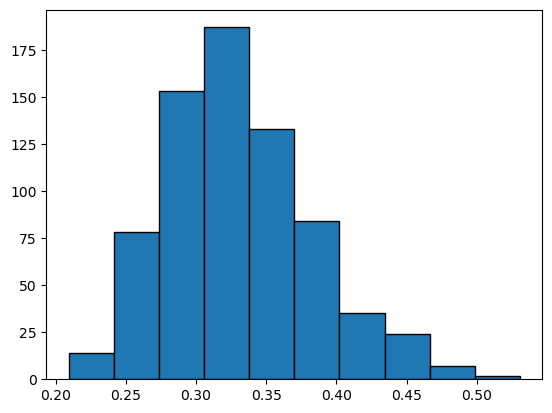

In [515]:
import matplotlib.pyplot as plt
from scipy import stats as ss

samples = bootstrap_score(x_test_df, y_test_df, ridge)
plt.hist(samples, edgecolor='k')
print('Intervalo de confiança: ({}, {})'.format(ss.scoreatpercentile(samples, 2.5),
                                                ss.scoreatpercentile(samples, 97.5)))